# Imports
Run this code to import necessary modules. Note that the functions ``cost_function`` and ``gradient`` imported from module ``gd`` are stubs. You will need to fill in the code in ``gd.py``.

In [58]:
%matplotlib inline

%load_ext autoreload
%autoreload 2


import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

from gd import cost_function, gradient, explicit_answer  # stubs

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Create a simple data set

Run this cell to generate and plot some data from the linear model $y \approx -1 + 2x$, that is, $\theta_0 = -1$ and  $\theta_1 = 2$.

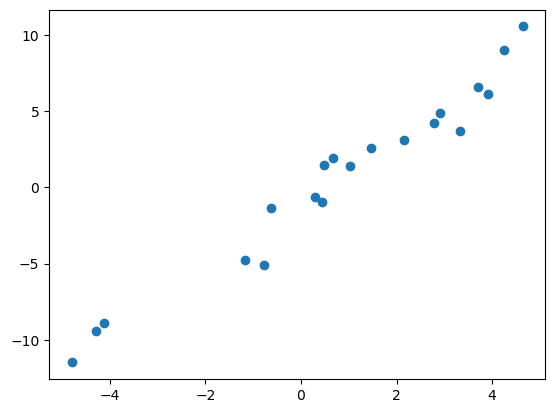

In [59]:
# Set the random seed so the program will always generate the same data
np.random.seed(0)

# Generate n random x values between -5 and 5
n = 20
x = 10 * np.random.rand(n) - 5

# Generate y values from the model y ~= 2x - 1
epsilon = np.random.randn(n)
y = -1 + 2*x + epsilon

plt.plot(x, y, marker='o', linestyle='none')
plt.show()

# TODO: implement the cost function
The squared error cost function is
$$\frac{1}{2} \sum_{i=1}^m \big(h_\theta(x^{(i)}) - y^{(i)}\big)^2.$$
$$h_\theta(x^{(i)})=\theta_0 + \theta_1 . x^{(i)}$$
Open the file ``gd.py`` and implement ``cost_function``. Then run this cell to test it out.

In [60]:
print(cost_function(x, y, 0,  1))   # should print 104.772951994
print(cost_function(x, y, 2, -1))   # should print 744.953822077
print(cost_function(x, y, -1, 2))   # should print 14.090816198

104.77295199433607
744.9538220768486
14.090816198013721


# Plotting setup
Run this cell. It sets up a routine ``plot_model`` that will be called later to illustrate the progress of gradient descent.

In [61]:
# Construct a dense grid of (theta_0, theta_1) values
theta0_vals = np.linspace(-10, 10)
theta1_vals = np.linspace(-10, 10)
[THETA0, THETA1] = np.meshgrid(theta0_vals, theta1_vals)

# Define a cost function that has x and y "baked in"
def mycost(theta0, theta1):
    return cost_function(x, y, theta0, theta1)

# Now vectorize this cost function and apply it simultaneously to all
# pairs in dense grid of (theta_0, theta_1) values
mycost_vectorized = np.vectorize(mycost)
J_SURF = mycost_vectorized(THETA0, THETA1)

# Define the test inputs
x_test = np.linspace(-5, 5, 100)

fig = plt.figure(1, figsize=(10,4))

# Create the figure
def init_plot():
    fig.clf()

    # Build left subplot (cost function)
    ax1 = fig.add_subplot(1, 2, 1) 
    ax1.contour(THETA0, THETA1, J_SURF, 20)
    ax1.set_xlabel('Intercept theta_0')
    ax1.set_ylabel('Slope theta_1')
    ax1.set_xlim([-10, 10])
    ax1.set_ylim([-10, 10])

    # The data will be added later for these plot elements:
    line, = ax1.plot([], [])
    dot,  = ax1.plot([], [], marker='o')

    # Build right subplot (data + current hypothesis)
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(x, y, marker='o', linestyle='none') 
    ax2.set_xlim([-6, 6])
    ax2.set_ylim([-10, 10])

    # The data will be added later for this:
    hyp, = ax2.plot( x_test, 0*x_test )
    
    return line, dot, hyp


# Define a function to update the plot
def update_plot(theta_0, theta_1, line, dot, hyp):
    line.set_xdata( np.append(line.get_xdata(), theta_0 ) )
    line.set_ydata( np.append(line.get_ydata(), theta_1 ) )
    dot.set_xdata([theta_0])
    dot.set_ydata([theta_1])
    hyp.set_ydata( theta_0 + theta_1 * x_test )

<Figure size 1000x400 with 0 Axes>

# TODO: implement the gradient
1. Review the mathematical expressions for $\frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1)$ and $\frac{\partial}{\partial \theta_1} J(\theta_0, \theta_1)$ for our model and cost funtion.
1. Implement the function ``gradient`` in ``gd.py`` to return these two partial derivatives.

Then run this cell to test your code: 

In [62]:
print(gradient(np.array([1, 2]), np.array([0, 1]), 0,  1)) # should print (2, 3)
print(gradient(x, y, 0,  1))   # should print (3.569176215534113, -163.58239266243288)
print(gradient(x, y, 2, -1))   # should print (10.94724640649514, -462.08205479805036)

(2, 3)
(3.569176215534111, -163.58239266243288)
(10.94724640649514, -462.0820547980504)


# TODO: implement gradient descent

1. In this cell you will implement gradient descent: 
    * Select a step size
    * Run for a fixed number of iterations (say, 20 or 200)
    * Update `theta_0` and `theta_1` using the partial derivatives (**Hint**: use the function ``gradient`` in ``gd.py``) 
    * Record the value of the cost function attained in each iteration of gradient descent so you can examine its progress.

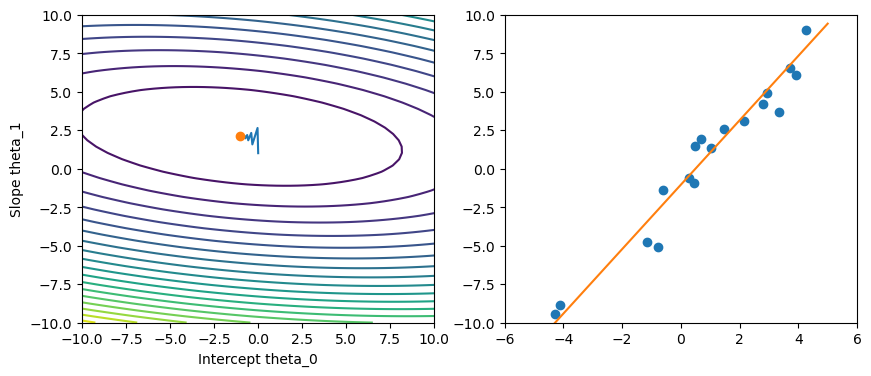

In [63]:

line, dot, hyp = init_plot()

iters = 20  # change as needed

####################################################################################
# TODO: intialize theta_0, theta_1, step size, and an array to save the cost function

theta_0, theta_1= 0,1
alpha= 0.01
cost_hist=[]

###################################################################################

for i in range(0, iters):
    
    #KEEP THIS CODE: this code will display progress of the 
    #algorithm as it runs 
    clear_output(wait=True)
    update_plot(theta_0, theta_1, line, dot, hyp)
    display(fig)
    
    #################################################################################
    # TODO: 
    #    - write code to get partial derivatives (hint: call gradient in gd.py) 
    d_theta_0, d_theta_1 = gradient(x, y, theta_0, theta_1)

    #    - update theta_0 and theta_1 with the partial derivatives and step size 
    theta_0 -= alpha * d_theta_0
    theta_1 -= alpha * d_theta_1
    
    #    - save cost function at each step (hint: call a function we gave you above)
    cost = cost_function(x, y, theta_0, theta_1)
    cost_hist.append(cost)
    #################################################################################

In [64]:
print(theta_0, theta_1)

-1.049091824416601 2.090787586665549


In [65]:
print('value of cost func over iterations: ')
print(cost_hist)

value of cost func over iterations: 
[57.62770196139053, 35.323522602699434, 24.5933105739712, 19.316757612892793, 16.649804138835428, 15.257228551370185, 14.503280141985709, 14.079499665742198, 13.832556130407585, 13.68393354391086, 13.59202283002933, 13.533941112249163, 13.496626939621677, 13.472361456035449, 13.456442925695114, 13.445935379708681, 13.438969556956563, 13.434337876617505, 13.431251884889603, 13.429192867485613]


# TODO: compare gradient descent thetas with explicit thetas
complete ``explicit_answer`` function in ``gd.py`` and print results of both ways.

In [66]:
############################################
# TODO: Write code print both results
print('Gradient descent thetas: ', (theta_0, theta_1))
print('Explicit thetas: ', explicit_answer(x, y))
###########################################

Gradient descent thetas:  (-1.049091824416601, 2.090787586665549)
Explicit thetas:  (-1.0702535799250912, 2.093491126207114)


# TODO: assess convergence
Plot the iteration (x-axis) vs. cost.

Text(0, 0.5, 'Cost')

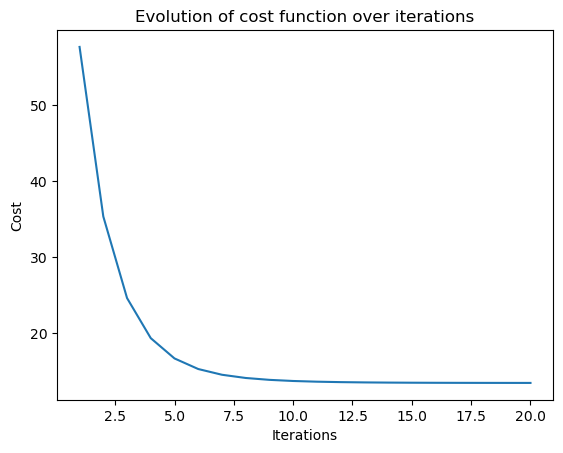

In [67]:
############################################
# TODO: Write code to plot and display here

plt.plot(list(range(1, iters+1)) ,cost_hist)
plt.title('Evolution of cost function over iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')

###########################################

 Did the algorithm converge? (Converging means it found the actual setting of $\theta$ that minimizes the cost. If the cost went up or did not go down as far as it could, it did not converge.)

** Yes, Based on the plot, the cost function decreases with each iteration. So the algorithm has found values for theta0 and theta1 that minimize the cost function, and the values are in agreement with the explicit thetas.so the algorithm converged **

# TODO: experiment with step size

After you have completed the implementation, do some experiments with different numbers of iterations and step sizes to assess convergence of the algorithm. Report the following:
* A step size for which the algorithm converges to the minimum in at most 200 iterations
* A step size for which the algorithm converges, but it takes more than 200 iterations
* A step size for which the algorithm does not converge, no matter how many iterations are run

A step size for which the algorithm converges to the minimum in at most 200 iterations

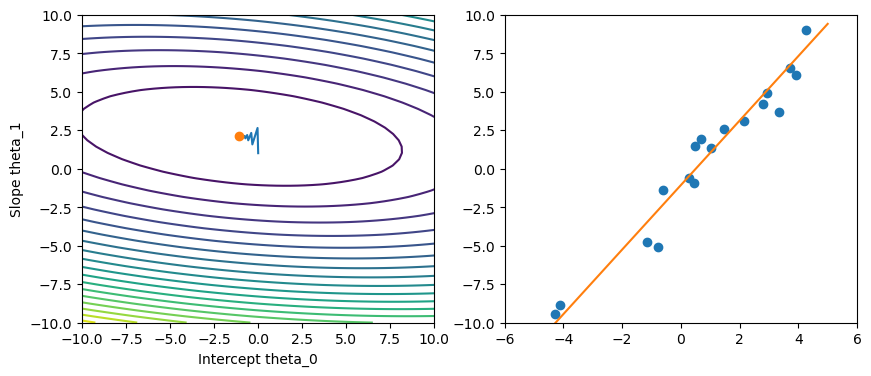

In [68]:

line, dot, hyp = init_plot()

iters = 200  # change as needed

####################################################################################
# TODO: intialize theta_0, theta_1, step size, and an array to save the cost function
theta_0, theta_1= 0,1
alpha= 0.01  #step_size
cost_hist=[]
###################################################################################

for i in range(0, iters):
    
    #KEEP THIS CODE: this code will display progress of the 
    #algorithm as it runs 
    clear_output(wait=True)
    update_plot(theta_0, theta_1, line, dot, hyp)
    display(fig)
    
    #################################################################################
    # TODO: 
    #    - write code to get partial derivatives (hint: call gradient in gd.py) 
    d_theta_0, d_theta_1 = gradient(x, y, theta_0, theta_1)
    #    - update theta_0 and theta_1 with the partial derivatives and step size 
    theta_0 -= alpha * d_theta_0
    theta_1 -= alpha * d_theta_1
    #    - save cost function at each step (hint: call a function we gave you above)
    cost = cost_function(x, y, theta_0, theta_1)
    cost_hist.append(cost)
    #################################################################################

In [69]:
print("(theta0,theta1):",(theta_0, theta_1))
print("(explicit theta0,explicit theta1):",explicit_answer(x, y))

(theta0,theta1): (-1.0702535799250912, 2.093491126207114)
(explicit theta0,explicit theta1): (-1.0702535799250912, 2.093491126207114)


Text(0, 0.5, 'Cost')

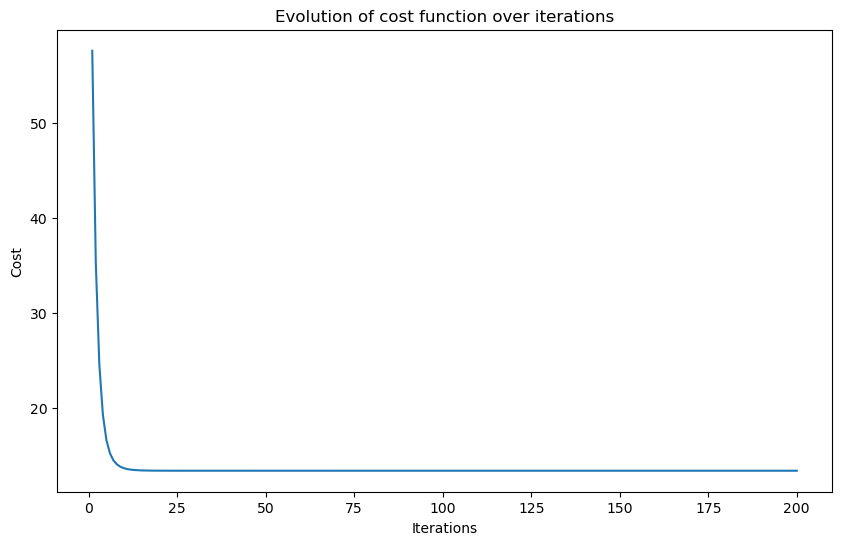

In [70]:
############################################
# TODO: Write code to plot and display here
plt.figure(figsize=(10,6))
plt.plot(list(range(1, iters+1)) ,cost_hist)
plt.title('Evolution of cost function over iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')

###########################################

With alpha= 0.01 algorithm converges to the minimum in at most 200 iterations

____________________________________________________________________________________________________

A step size for which the algorithm converges, but it takes more than 200 iterations

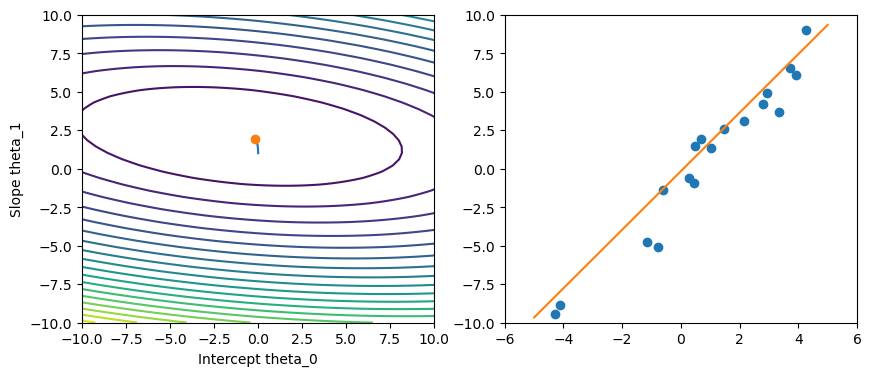

In [71]:

line, dot, hyp = init_plot()

iters = 200  # change as needed

####################################################################################
# TODO: intialize theta_0, theta_1, step size, and an array to save the cost function
theta_0, theta_1= 0,1
alpha= 0.00007  #step_size
cost_hist=[]
###################################################################################

for i in range(0, iters):
    
    #KEEP THIS CODE: this code will display progress of the 
    #algorithm as it runs 
    clear_output(wait=True)
    update_plot(theta_0, theta_1, line, dot, hyp)
    display(fig)
    
    #################################################################################
    # TODO: 
    #    - write code to get partial derivatives (hint: call gradient in gd.py) 
    d_theta_0, d_theta_1 = gradient(x, y, theta_0, theta_1)
    #    - update theta_0 and theta_1 with the partial derivatives and step size 
    theta_0 -= alpha * d_theta_0
    theta_1 -= alpha * d_theta_1
    #    - save cost function at each step (hint: call a function we gave you above)
    cost = cost_function(x, y, theta_0, theta_1)
    cost_hist.append(cost)
    #################################################################################

In [72]:
print('For alpha= 0.00007 and iter=200')
print("(theta0,theta1):",  (theta_0, theta_1))
print("(explicit theta0,explicit theta1):", explicit_answer(x, y))

For alpha= 0.00007 and iter=200
(theta0,theta1): (-0.16827425045350408, 1.9013140661864543)
(explicit theta0,explicit theta1): (-1.0702535799250912, 2.093491126207114)


Text(0, 0.5, 'Cost')

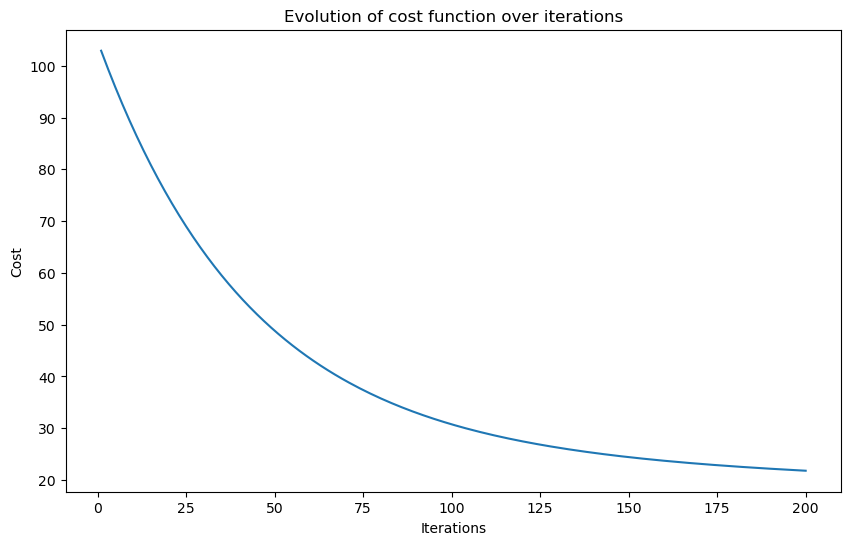

In [73]:
############################################
# TODO: Write code to plot and display here
plt.figure(figsize=(10,6))
plt.plot(list(range(1, iters+1)) ,cost_hist)
plt.title('Evolution of cost function over iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')

###########################################

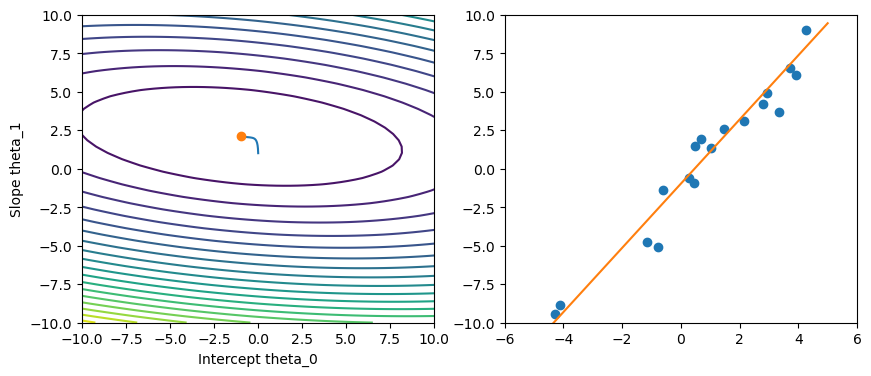

In [74]:
line, dot, hyp = init_plot()

iters = 2000  # change as needed

####################################################################################
# TODO: intialize theta_0, theta_1, step size, and an array to save the cost function
theta_0, theta_1= 0,1
alpha= 0.00007  #step_size
cost_hist=[]
###################################################################################

for i in range(0, iters):
    
    #KEEP THIS CODE: this code will display progress of the 
    #algorithm as it runs 
    clear_output(wait=True)
    update_plot(theta_0, theta_1, line, dot, hyp)
    display(fig)
    
    #################################################################################
    # TODO: 
    #    - write code to get partial derivatives (hint: call gradient in gd.py) 
    d_theta_0, d_theta_1 = gradient(x, y, theta_0, theta_1)
    #    - update theta_0 and theta_1 with the partial derivatives and step size 
    theta_0 -= alpha * d_theta_0
    theta_1 -= alpha * d_theta_1
    #    - save cost function at each step (hint: call a function we gave you above)
    cost = cost_function(x, y, theta_0, theta_1)
    cost_hist.append(cost)
    #################################################################################

In [75]:
print('For alpha= 0.00007 and iter=2000')
print("(theta0,theta1):",(theta_0, theta_1))
print("(explicit theta0,explicit theta1):",explicit_answer(x, y))

For alpha= 0.00007 and iter=2000
(theta0,theta1): (-0.9782583374521296, 2.0833087931979377)
(explicit theta0,explicit theta1): (-1.0702535799250912, 2.093491126207114)


Text(0, 0.5, 'Cost')

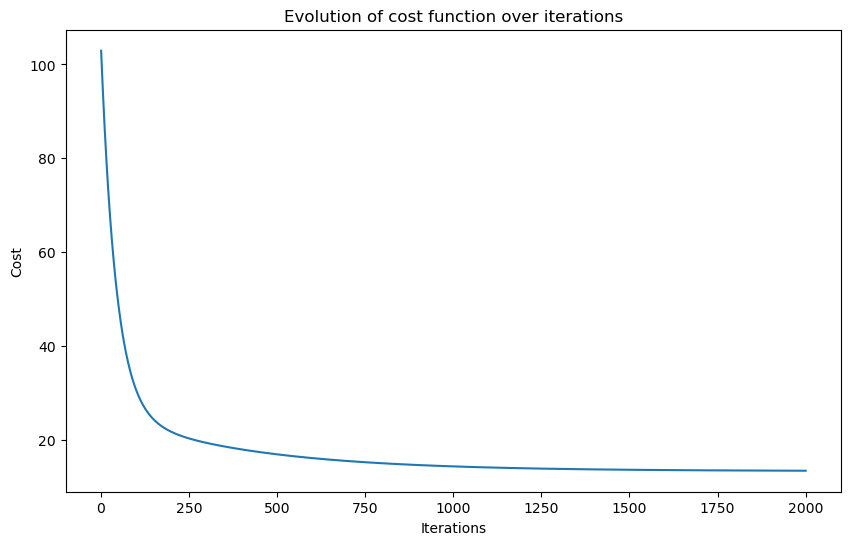

In [76]:
############################################
# TODO: Write code to plot and display here
plt.figure(figsize=(10,6))
plt.plot(list(range(1, iters+1)) ,cost_hist)
plt.title('Evolution of cost function over iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')

###########################################

With alpha= 0.00007 the algorithm converges, but it takes more than 200 iterations

______________________________________________________________________________________________________________________

A step size for which the algorithm does not converge, no matter how many iterations are run

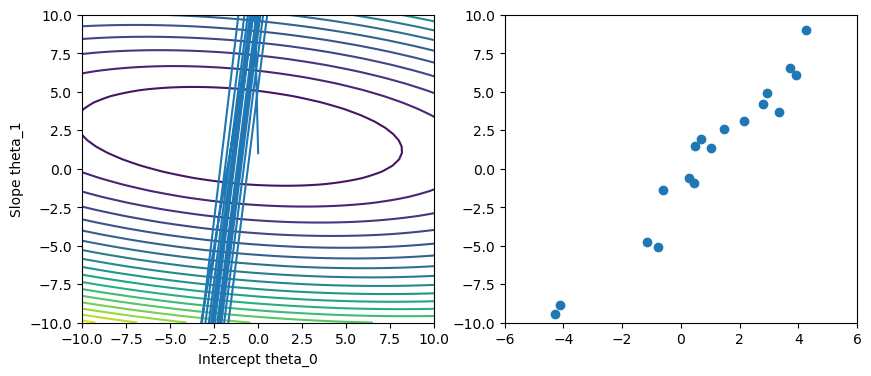

In [77]:

line, dot, hyp = init_plot()

iters = 1000  # change as needed

####################################################################################
# TODO: intialize theta_0, theta_1, step size, and an array to save the cost function
theta_0, theta_1= 0,1
alpha= 0.1  #step_size
cost_hist=[]
###################################################################################

for i in range(0, iters):
    
    #KEEP THIS CODE: this code will display progress of the 
    #algorithm as it runs 
    clear_output(wait=True)
    update_plot(theta_0, theta_1, line, dot, hyp)
    display(fig)
    
    #################################################################################
    # TODO: 
    #    - write code to get partial derivatives (hint: call gradient in gd.py) 
    d_theta_0, d_theta_1 = gradient(x, y, theta_0, theta_1)
    #    - update theta_0 and theta_1 with the partial derivatives and step size 
    theta_0 -= alpha * d_theta_0
    theta_1 -= alpha * d_theta_1
    #    - save cost function at each step (hint: call a function we gave you above)
    cost = cost_function(x, y, theta_0, theta_1)
    cost_hist.append(cost)
    #################################################################################

In [78]:
print('For alpha= 0.1 and iter=1000')
print("(theta0,theta1):",(theta_0, theta_1))
print("(explicit theta0,explicit theta1):", explicit_answer(x, y))

For alpha= 0.1 and iter=1000
(theta0,theta1): (nan, nan)
(explicit theta0,explicit theta1): (-1.0702535799250912, 2.093491126207114)


Text(0, 0.5, 'Cost')

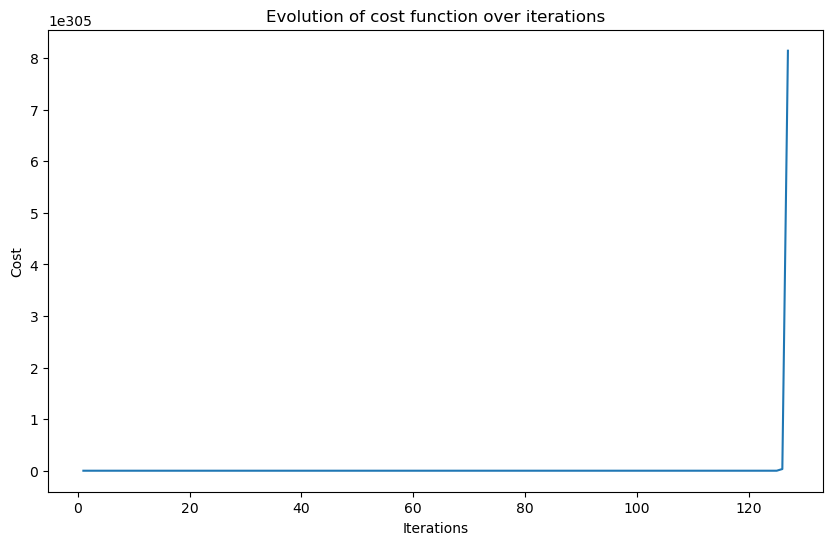

In [79]:
############################################
# TODO: Write code to plot and display here
plt.figure(figsize=(10,6))
plt.plot(list(range(1, iters+1)) ,cost_hist)
plt.title('Evolution of cost function over iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')

###########################################

step size(learning rate) is too large so the algorithm take large steps during each iteration, and overshoot the minimum of the cost function and fail to converge.